<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/SQL/trainsql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sqlalchemy import create_engine 
from sqlalchemy import inspect
import pandas as pd

In [2]:
# download Northwind SQLite DB
!wget https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/northwind.sqlite3
!wget https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/Northwind_small.sqlite

--2022-06-22 01:26:06--  https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/northwind.sqlite3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804864 (786K) [application/octet-stream]
Saving to: ‘northwind.sqlite3’

northwind.sqlite3   100%[===================>] 786.00K  --.-KB/s    in 0.05s   

2022-06-22 01:26:06 (16.4 MB/s) - ‘northwind.sqlite3’ saved [804864/804864]

--2022-06-22 01:26:06--  https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/Northwind_small.sqlite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

In [3]:
# We will first load an sql extension into our environment
# This extension will allow us to work with sql on Colaboratory
#

engine2 = create_engine('sqlite:///test.db', echo=False)

%load_ext sql

%sql sqlite:///test.db

'Connected: @test.db'

In [4]:
#
%%sql 
CREATE TABLE if not exists Classmates (
    PersonID, 
    LastName, 
    FirstName, 
    Phone, 
    Residence
); 

SELECT * From Classmates;

 * sqlite:///test.db
Done.
Done.


PersonID,LastName,FirstName,Phone,Residence


In [5]:
%%sql
CREATE TABLE IF NOT EXISTS Cursos
    ("cod_curso" int, "desc_curso" varchar(15))
;
    
INSERT INTO Cursos
    ("cod_curso", "desc_curso")
VALUES
    (1, 'Informática'),
    (2, 'Eletrônica'),
    (3, 'Desenho Técnico')
;


CREATE TABLE IF NOT EXISTS Professores
    ("cod_prof" int, "desc_prof" varchar(15))
;
    
INSERT INTO Professores
    ("cod_prof", "desc_prof")
VALUES
    (1, 'Roberto Augusto'),
    (2, 'César Amador'),
    (3, 'Joice Silva')
;


CREATE TABLE IF NOT EXISTS Aulas
    ("data_aula" varchar(10), "hora_aula" varchar(5), "cod_prof" int, "cod_curso" int)
;
    
INSERT INTO Aulas
    ("data_aula", "hora_aula", "cod_prof", "cod_curso")
VALUES
    ('01/05/2018', '13:00', 1, 1),
    ('01/05/2018', '14:00', 2, 3),
    ('01/01/2018', '15:00', 3, 2)

 * sqlite:///test.db
Done.
3 rows affected.
Done.
3 rows affected.
Done.
3 rows affected.


[]

In [6]:
%%sql
SELECT a.data_aula AS "Data da Aula",a.hora_aula AS "Horário da Aula",p.desc_prof AS "Nome do Professor",c.desc_curso AS "Nome do Curso"
FROM Aulas AS a
INNER JOIN Professores AS p
ON a.cod_prof = p.cod_prof
INNER JOIN Cursos AS c
ON a.cod_curso = c.cod_curso
ORDER BY "Horário da Aula"

 * sqlite:///test.db
Done.


Data da Aula,Horário da Aula,Nome do Professor,Nome do Curso
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,14:00,César Amador,Desenho Técnico
01/01/2018,15:00,Joice Silva,Eletrônica


In [7]:
%%sql

CREATE TABLE IF NOT EXISTS Fam(Name TEXT, Age INTEGER, Profession TEXT, Major TEXT);
INSERT INTO Fam (Name, Age) VALUES
('Pam', 50),
('Miranda', 32),
('Pascal', 45),
('Dave', 12),
('Emmy', 23);

UPDATE Fam SET Profession='Unknown' WHERE Profession ISNULL

 * sqlite:///test.db
Done.
5 rows affected.
5 rows affected.


[]

In [8]:
%sql SELECT * FROM Fam

 * sqlite:///test.db
Done.


Name,Age,Profession,Major
Pam,50,Unknown,None
Miranda,32,Unknown,None
Pascal,45,Unknown,None
Dave,12,Unknown,None
Emmy,23,Unknown,None


In [9]:
res = %sql SELECT * FROM Fam

df = res.DataFrame()
df

 * sqlite:///test.db
Done.


,Name,Age,Profession,Major
0,Pam,50,Unknown,None
1,Miranda,32,Unknown,None
2,Pascal,45,Unknown,None
3,Dave,12,Unknown,None
4,Emmy,23,Unknown,None


In [10]:
df.to_sql('products', con=engine2, if_exists='replace', index = False)

In [11]:
engine2.execute("SELECT * FROM products").fetchall()

[('Pam', 50, 'Unknown', None),
 ('Miranda', 32, 'Unknown', None),
 ('Pascal', 45, 'Unknown', None),
 ('Dave', 12, 'Unknown', None),
 ('Emmy', 23, 'Unknown', None)]

In [12]:
df = res.DataFrame()
df

,Name,Age,Profession,Major
0,Pam,50,Unknown,None
1,Miranda,32,Unknown,None
2,Pascal,45,Unknown,None
3,Dave,12,Unknown,None
4,Emmy,23,Unknown,None


In [13]:
dfbt = pd.DataFrame([[9991 ,'John', 'Liverpool'],
[9992 ,'Paul', 'Liverpool'],
[9993, 'Ringo', 'Liverpool'],
[9994,'George', 'Liverpool']], columns = ['ID', 'Name', 'Born_in'])

dfinst = pd.DataFrame([[9991 ,'Vocal' ,'Liverpool'],
[9992, 'Base' ,'Liverpool'],
[9993 ,'Drums' ,'Liverpool'],
[9995, 'Guitar', 'Arsenal'],
[9992 ,'Piano' ,'Liverpool']],columns = ['ID', 'Instrument' ,'Football_Club'])


dfbt

,ID,Name,Born_in
0,9991,John,Liverpool
1,9992,Paul,Liverpool
2,9993,Ringo,Liverpool
3,9994,George,Liverpool


In [14]:
dfbt.to_sql('A', con=engine2, if_exists='replace', index = False)
dfinst.to_sql('B', con=engine2, if_exists='replace', index = False)

In [15]:
rsq = engine2.execute('''SELECT A.ID, A.Name, A.Born_in, B.Instrument, B.Football_Club
From A
LEFT JOIN B
ON A.ID = B.ID''').fetchall()
pd.DataFrame(rsq)

,0,1,2,3,4
0,9991,John,Liverpool,Vocal,Liverpool
1,9992,Paul,Liverpool,Base,Liverpool
2,9992,Paul,Liverpool,Piano,Liverpool
3,9993,Ringo,Liverpool,Drums,Liverpool
4,9994,George,Liverpool,None,None


In [16]:
rsq

[(9991, 'John', 'Liverpool', 'Vocal', 'Liverpool'),
 (9992, 'Paul', 'Liverpool', 'Base', 'Liverpool'),
 (9992, 'Paul', 'Liverpool', 'Piano', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool', 'Drums', 'Liverpool'),
 (9994, 'George', 'Liverpool', None, None)]

In [17]:
engine2.execute('SELECT * FROM A').fetchall()

[(9991, 'John', 'Liverpool'),
 (9992, 'Paul', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool'),
 (9994, 'George', 'Liverpool')]

In [18]:
engine2.execute('SELECT * FROM A').fetchall()

[(9991, 'John', 'Liverpool'),
 (9992, 'Paul', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool'),
 (9994, 'George', 'Liverpool')]

In [19]:
%%sql

CREATE TABLE IF NOT EXISTS Beatles
    ("ID" int, "Name" varchar(10), "Born_in" varchar(15))
;
    
INSERT INTO Beatles
    ("ID" , "Name", "Born_in")
VALUES
    (9991, 'John', 'Liverpool'),
     (9992, 'Paul', 'Liverpool'), 
     (9993, 'Ringo', 'Liverpool'), 
     (9994, 'George', 'Liverpool')
;


CREATE TABLE IF NOT EXISTS Beatles2
    ("ID" int, "Instrument" varchar(10), "Football_Club" varchar(15))
;
    
INSERT INTO Beatles2
    ("ID" , "Instrument", "Football_Club")
VALUES
    (9991, 'John', 'Liverpool'),
 (9992, 'Paul', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool'),
 (9994, 'George', 'Liverpool')
;


 * sqlite:///test.db
Done.
4 rows affected.
Done.
4 rows affected.


[]

In [20]:
%sql SELECT * FROM Beatles

 * sqlite:///test.db
Done.


ID,Name,Born_in
9991,John,Liverpool
9992,Paul,Liverpool
9993,Ringo,Liverpool
9994,George,Liverpool


In [21]:
%%sql
SELECT A.ID, A.Name, A.Born_in, B.Instrument, B.Football_Club
From Beatles AS A
LEFT JOIN Beatles2 AS B
ON A.ID = B.ID

 * sqlite:///test.db
Done.


ID,Name,Born_in,Instrument,Football_Club
9991,John,Liverpool,John,Liverpool
9992,Paul,Liverpool,Paul,Liverpool
9993,Ringo,Liverpool,Ringo,Liverpool
9994,George,Liverpool,George,Liverpool


In [22]:
insp = inspect(engine2)
print(insp.get_table_names())

['A', 'Aulas', 'B', 'Beatles', 'Beatles2', 'Classmates', 'Cursos', 'Fam', 'Professores', 'products']


In [23]:
# %load_ext sql

%sql sqlite:///Northwind_small.sqlite

'Connected: @Northwind_small.sqlite'

In [24]:
%%sql
SELECT sqlite_version();

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


sqlite_version()
3.22.0


In [25]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


name
Employee
Category
Customer
Shipper
Supplier
Order
Product
OrderDetail
CustomerCustomerDemo
CustomerDemographic


In [26]:
%sql PRAGMA table_info([Category]);

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Id,INTEGER,0,None,1
1,CategoryName,VARCHAR(8000),0,None,0
2,Description,VARCHAR(8000),0,None,0


In [27]:
%sql PRAGMA table_info([Customer]);

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Id,VARCHAR(8000),0,None,1
1,CompanyName,VARCHAR(8000),0,None,0
2,ContactName,VARCHAR(8000),0,None,0
3,ContactTitle,VARCHAR(8000),0,None,0
4,Address,VARCHAR(8000),0,None,0
5,City,VARCHAR(8000),0,None,0
6,Region,VARCHAR(8000),0,None,0
7,PostalCode,VARCHAR(8000),0,None,0
8,Country,VARCHAR(8000),0,None,0
9,Phone,VARCHAR(8000),0,None,0


In [28]:
%sql SELECT * FROM Customer LIMIT 20

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,Western Europe,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,Western Europe,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,Southern Europe,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app,Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,Western Europe,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [29]:
engine = create_engine('sqlite:///Northwind_small.sqlite')

In [30]:
insp2 = inspect(engine)
print(insp2.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [31]:
%%sql
-- find out relationships between tables using SQL command
SELECT sql
FROM sqlite_master
WHERE name = "Orders"

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


sql


In [32]:
%sql SELECT * FROM Category

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


Id,CategoryName,Description
1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings"
3,Confections,"Desserts, candies, and sweet breads"
4,Dairy Products,Cheeses
5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
6,Meat/Poultry,Prepared meats
7,Produce,Dried fruit and bean curd
8,Seafood,Seaweed and fish


In [ ]:
# %sql SELECT * FROM Employee

In [34]:
%%sql
-- take a look at the Employees table first
-- use LIMIT to limit the rows being displayed
SELECT FirstName, LastName, HireDate, Title, Country
FROM Employee
-- LIMIT 100

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


FirstName,LastName,HireDate,Title,Country
Nancy,Davolio,2024-05-01,Sales Representative,USA
Andrew,Fuller,2024-08-14,"Vice President, Sales",USA
Janet,Leverling,2024-04-01,Sales Representative,USA
Margaret,Peacock,2025-05-03,Sales Representative,USA
Steven,Buchanan,2025-10-17,Sales Manager,UK
Michael,Suyama,2025-10-17,Sales Representative,UK
Robert,King,2026-01-02,Sales Representative,UK
Laura,Callahan,2026-03-05,Inside Sales Coordinator,USA
Anne,Dodsworth,2026-11-15,Sales Representative,UK


In [35]:
# %load_ext sql

%sql sqlite:///northwind.sqlite3

'Connected: @northwind.sqlite3'

In [36]:
%%sql
SELECT sqlite_version();

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


sqlite_version()
3.22.0


In [37]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


name
Suppliers
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


In [38]:
%sql PRAGMA table_info([Categories]);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,CategoryID,INTEGER,1,None,1
1,CategoryName,nvarchar(15),1,None,0
2,Description,ntext,0,None,0
3,Picture,image,0,None,0


In [39]:
%sql PRAGMA table_info([Customers]);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,CustomerID,nchar(5),1,None,1
1,CompanyName,nvarchar(40),1,None,0
2,ContactName,nvarchar(30),0,None,0
3,ContactTitle,nvarchar(30),0,None,0
4,Address,nvarchar(60),0,None,0
5,City,nvarchar(15),0,None,0
6,Region,nvarchar(15),0,None,0
7,PostalCode,nvarchar(10),0,None,0
8,Country,nvarchar(15),0,None,0
9,Phone,nvarchar(24),0,None,0


In [40]:
%sql SELECT * FROM Customers LIMIT 20

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [41]:
engine = create_engine('sqlite:///northwind.sqlite3')

In [42]:
insp2 = inspect(engine)
print(insp2.get_table_names())

['Categories', 'Customers', 'Employees', 'OrderDetails', 'Orders', 'Products', 'Shippers', 'Suppliers', 'sqlite_sequence']


In [43]:
%%sql
-- find out relationships between tables using SQL command
SELECT sql
FROM sqlite_master
WHERE name = "Orders"

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


sql
"CREATE TABLE [Orders] ( [OrderID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CustomerID] nchar(5) NOT NULL COLLATE NOCASE, [EmployeeID] int NULL, [OrderDate] datetime NULL, [RequiredDate] datetime NULL, [ShippedDate] datetime NULL, [ShipVia] int NULL, [Freight] money DEFAULT 0 NULL, [ShipName] nvarchar(40) NULL COLLATE NOCASE, [ShipAddress] nvarchar(60) NULL COLLATE NOCASE, [ShipCity] nvarchar(15) NULL COLLATE NOCASE, [ShipRegion] nvarchar(15) NULL COLLATE NOCASE, [ShipPostalCode] nvarchar(10) NULL COLLATE NOCASE, [ShipCountry] nvarchar(15) NULL COLLATE NOCASE, CONSTRAINT [FK_Orders_Customers] FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Employees] FOREIGN KEY ([EmployeeID]) REFERENCES [Employees] ([EmployeeID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Shippers] FOREIGN KEY ([ShipVia]) REFERENCES [Shippers] ([ShipperID]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


In [44]:
# Just curious, what's in the picture column?
result = %sql SELECT CategoryName, Picture FROM Categories;
# result.DataFrame().loc[0, 'Picture']

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


In [ ]:
# %sql SELECT * FROM Categories LIMIT 1

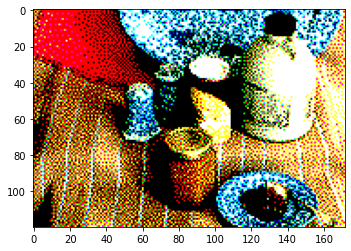

In [46]:
# still curious about the picture column?
# image is actually stored as a blob (Binary Large Object) in SQLite
from matplotlib.pyplot import imshow
from PIL import Image
from io import BytesIO
%matplotlib inline
row = 1
im = Image.open(BytesIO(result.DataFrame().loc[row, 'Picture'][78:])) # cut the first 78 bytes (OLE header)
# print(im)
imshow(im);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


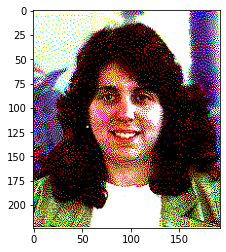

In [47]:
result = %sql SELECT Extension,Photo FROM Employees;
row = 2
im = Image.open(BytesIO(result.DataFrame().loc[row,'Photo'][78:])) # cut the first 78 bytes (OLE header)
# print(im)
imshow(im);

In [49]:
lemp = %sql PRAGMA table_info(Employees)
lemp

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,EmployeeID,INTEGER,1,None,1
1,LastName,nvarchar(20),1,None,0
2,FirstName,nvarchar(10),1,None,0
3,Title,nvarchar(30),0,None,0
4,TitleOfCourtesy,nvarchar(25),0,None,0
5,BirthDate,datetime,0,None,0
6,HireDate,datetime,0,None,0
7,Address,nvarchar(60),0,None,0
8,City,nvarchar(15),0,None,0
9,Region,nvarchar(15),0,None,0


In [50]:
type(lemp)

sql.run.ResultSet

In [51]:
# %sql SELECT * FROM Employees LIMIT 2

In [52]:
%%sql
-- take a look at the Employees table first
-- use LIMIT to limit the rows being displayed
SELECT FirstName, LastName, HireDate, Title, Country
FROM Employees
-- LIMIT 100

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


FirstName,LastName,HireDate,Title,Country
Nancy,Davolio,2010-05-01 00:00:00.000,Sales Representative,USA
Andrew,Fuller,2010-08-14 00:00:00.000,"Vice President, Sales",USA
Janet,Leverling,2010-04-01 00:00:00.000,Sales Representative,USA
Margaret,Peacock,2011-05-03 00:00:00.000,Sales Representative,USA
Steven,Buchanan,2011-10-17 00:00:00.000,Sales Manager,UK
Michael,Suyama,2011-10-17 00:00:00.000,Sales Representative,UK
Robert,King,2012-01-02 00:00:00.000,Sales Representative,UK
Laura,Callahan,2012-03-05 00:00:00.000,Inside Sales Coordinator,USA
Anne,Dodsworth,2012-11-15 00:00:00.000,Sales Representative,UK


In [66]:
%sql SELECT COUNT(*) ,Country FROM Customers GROUP BY Country

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


COUNT(*),Country
3,Argentina
2,Austria
2,Belgium
9,Brazil
3,Canada
2,Denmark
2,Finland
11,France
11,Germany
1,Ireland
